# Evaluation of U-Net segmentation performance
* Data: X-ray angiogram
* Model: Pytorch-UNet
* Training: used 20 batch size and saved for 20 epochs

In [11]:
import sys
sys.path.append('..')
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image, ImageOps, ImageFilter, ImageChops
import random
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, jaccard_score, matthews_corrcoef
np.set_printoptions(precision=4)

In [12]:
# helper functions

def create_folder(folder_path):
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
        print(f"Folder '{folder_path}' created successfully.")
#     else:
#         print(f"Folder '{folder_path}' already exists.")
        
def get_paths(project_path, dataset, epoch_ver):
    img_path = data_path + dataset + '/imgs/'
    mask_path = data_path + dataset + '/masks/'
    pred_path = data_path + dataset + f'/predict/{epoch_ver[0]}_{epoch_ver[1]}/'
    create_folder(pred_path)    
    return img_path, mask_path, pred_path

def plot_img_mask_pred(dataset, path, img_num, epoch_ver):
    folder = ['imgs', 'masks', 'predict']
    
    fig,axs = plt.subplots(1, 3, figsize = (9,3))
    for i, title in enumerate(titles):    
        if i == 0:
            p = f'{path}/{title}'
            f = f'img_{img_num}.png'
        elif i == 1:
            p = f'{path}/{title}'
            f = f'img_{img_num}.png'
        else:
            p = f'{path}/{title}'
            f = f'img_{img_num}.png'            
            
        with Image.open(os.path.join(p, f)) as img:
            t = f'{dataset}, {title}'
            t = f'{t}, {epoch_ver[1]}' if i == 2 else t 
            axs[i].imshow(img)
            axs[i].set_title(t)

def intersection_over_union(y_true, y_pred):
    intersection = np.sum(y_true * y_pred)
    union = np.sum(y_true) + np.sum(y_pred) - intersection
    iou = intersection / (union + 1e-7)  # Add a small epsilon to avoid division by zero
    return iou

def dice_sim(y_pred, y_true, k = 1):
    intersection = np.sum(y_pred[y_true==k]) * 2.0
    dice = intersection / (np.sum(y_pred) + np.sum(y_true))
    return dice

def calculate_metrics(y_true, y_pred):
    # Flatten the ground truth and predicted masks
    y_true_flat = y_true.flatten()
    y_pred_flat = y_pred.flatten()

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_true_flat, y_pred_flat)
    precision = precision_score(y_true_flat, y_pred_flat)
    recall = recall_score(y_true_flat, y_pred_flat)
    f1 = f1_score(y_true_flat, y_pred_flat)
    jaccard = jaccard_score(y_true_flat, y_pred_flat)
    iou = intersection_over_union(y_true_flat, y_pred_flat)
    dice = dice_sim(y_pred_flat, y_true_flat)
    matt = matthews_corrcoef(y_true_flat, y_pred_flat)

    return accuracy, precision, recall, f1, jaccard, iou, dice, matt
    
def save_results():
    pass

def plot_results():
    pass

# Visualize & evaluate with examples
* train vs test
* compare img, mask, prediction

In [ ]:
# dataset paths
project_path = '/home/ubuntu/project/Pytorch-UNet/'
data_path = project_path + 'data_xray/'

# user params
# datasets = ['train', 'test']
datasets = ['train']
epoch_vers = [['v3', 'epoch1'], ['v3', 'epoch20']]

# get paths and files
for dataset in datasets:
    print(f'Dataset: {dataset}')
    
    for epoch_ver in epoch_vers:
        print(f'Epoch: {epoch_ver}')
        acc = []
        prec = []
        rec = []
        f1 = []
        jaccard = []
        io = []
        di = []
        mat = []
        img_path, mask_path, pred_path = get_paths(data_path, dataset, epoch_ver)
        
        #randomly choose files
        file = random.sample(os.listdir(pred_path), 1)[0]     
        img_num = file[4:-12]

        # Calculate evaluation metrics
        with Image.open(os.path.join(mask_path, f'img_{img_num}_mask.png')) as img:
            y_true = np.array(img)
            
        with Image.open(os.path.join(pred_path, f'img_{img_num}_predict.png')) as img:
            y_pred = np.array(img)    
    
        accuracy, precision, recall, f1, jaccard, iou, dice, matt = calculate_metrics(y_true, y_pred)      
        print(f'accuracy={accuracy}, precision={precision}, recall={recall}')
        print(f'f1={f1}, jaccard={jaccard}, iou={iou}')
        print(f'dice={dice}, matthew={matt}')
        
        # select one example and plot
        #path = f'{data_path}{dataset}'
        #plot_img_mask_pred(dataset, path, img_num, epoch_ver)     

# evaluation with a few images

# Read files for evaluation
* train vs test
* mask (ground truth) vs prediction

In [21]:
# user params
datasets = ['train', 'test']
epoch_vers = [['v3', f'epoch{i}'] for i in range(1, 21)]

for dataset in datasets:
    print(f'Dataset: {dataset}')
    mean_accuracy = []
    mean_precision = []
    mean_recall = []
    mean_f1 = []
    mean_jaccard = []
    mean_iou = []
    mean_dice = []
    mean_matthew = []
    
    for epoch_ver in epoch_vers:
        print(f'Epoch: {epoch_ver}')
        acc = []
        prec = []
        rec = []
        f1_list = []
        jac = []
        io = []
        di = []
        mat = []
        # There will be 100 images per each path.
        

        for file in os.listdir(pred_path):
            img_num = file[4:-12]

            # Calculate evaluation metrics
            with Image.open(os.path.join(mask_path, f'img_{img_num}_mask.png')) as img:
                y_true = np.array(img)
            
            with Image.open(os.path.join(pred_path, f'img_{img_num}_predict.png')) as img:
                y_pred = np.array(img)    
            
            accuracy, precision, recall, f1, jaccard, iou, dice, matt = calculate_metrics(y_true, y_pred)
            acc.append(accuracy)
            prec.append(precision)
            rec.append(recall)
            f1_list.append(f1)
            jac.append(jaccard)
            io.append(iou)
            di.append(dice)
            mat.append(matt)
            
        print(f'accuracy={round(np.mean(accuracy), 2)}, precision={round(np.mean(precision), 2)}, recall={round(np.mean(recall), 2)}')
        print(f'f1={round(np.mean(f1), 2)}, jaccard={round(np.mean(jaccard), 2)}, iou={round(np.mean(iou), 2)}')
        print(f'dice={round(np.mean(dice), 2)}, matthew={round(np.mean(matt), 2)}')
        mean_accuracy.append(np.mean(accuracy))
        mean_precision.append(np.mean(precision))
        mean_recall.append(np.mean(recall))
        mean_f1.append(np.mean(f1))
        mean_jaccard.append(np.mean(jaccard))
        mean_iou.append(np.mean(iou))
        mean_dice.append(np.mean(dice))
        mean_matthew.append(np.mean(matt))


Dataset: train
Epoch: ['v3', 'epoch1']
accuracy=0.99, precision=0.99, recall=0.99
f1=0.99, jaccard=0.98, iou=0.98
dice=0.99, matthew=0.98
Epoch: ['v3', 'epoch2']
accuracy=0.99, precision=0.99, recall=0.99
f1=0.99, jaccard=0.98, iou=0.98
dice=0.99, matthew=0.98
Epoch: ['v3', 'epoch3']
accuracy=0.99, precision=0.99, recall=0.99
f1=0.99, jaccard=0.98, iou=0.98
dice=0.99, matthew=0.98
Epoch: ['v3', 'epoch4']
accuracy=0.99, precision=0.99, recall=0.99
f1=0.99, jaccard=0.98, iou=0.98
dice=0.99, matthew=0.98
Epoch: ['v3', 'epoch5']
accuracy=0.99, precision=0.99, recall=0.99
f1=0.99, jaccard=0.98, iou=0.98
dice=0.99, matthew=0.98
Epoch: ['v3', 'epoch6']
accuracy=0.99, precision=0.99, recall=0.99
f1=0.99, jaccard=0.98, iou=0.98
dice=0.99, matthew=0.98
Epoch: ['v3', 'epoch7']
accuracy=0.99, precision=0.99, recall=0.99
f1=0.99, jaccard=0.98, iou=0.98
dice=0.99, matthew=0.98
Epoch: ['v3', 'epoch8']
accuracy=0.99, precision=0.99, recall=0.99
f1=0.99, jaccard=0.98, iou=0.98
dice=0.99, matthew=0.98
E

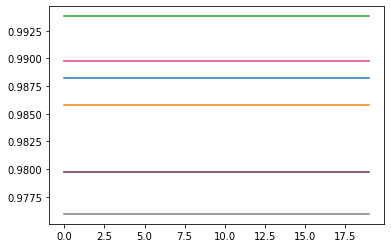

In [23]:
plt.plot(mean_accuracy)
plt.plot(mean_precision)
plt.plot(mean_recall)
plt.plot(mean_f1)
plt.plot(mean_jaccard)
plt.plot(mean_iou)
plt.plot(mean_dice)
plt.plot(mean_matthew)

# Evaluation

* metric: mean_IOU
* metric per each prediction
* save the metrics in pd.df
* visualize the mean metrics from train (100) vs test (100)
* bias vs variance, under-fitting or over-fitting, optimal epoch, 
* need to tune other hyper-params? batch, learning-rate, etc

In [5]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, jaccard_score

def intersection_over_union(y_true, y_pred):
    intersection = np.sum(y_true * y_pred)
    union = np.sum(y_true) + np.sum(y_pred) - intersection
    iou = intersection / (union + 1e-7)  # Add a small epsilon to avoid division by zero
    return iou

def calculate_metrics(y_true, y_pred):
    # Flatten the ground truth and predicted masks
    y_true_flat = y_true.flatten()
    y_pred_flat = y_pred.flatten()

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_true_flat, y_pred_flat)
    precision = precision_score(y_true_flat, y_pred_flat)
    recall = recall_score(y_true_flat, y_pred_flat)
    f1 = f1_score(y_true_flat, y_pred_flat)
    jaccard = jaccard_score(y_true_flat, y_pred_flat)
    iou = intersection_over_union(y_true_flat, y_pred_flat)

    return accuracy, precision, recall, f1, jaccard, iou

# Example usage
# Assuming you have ground truth masks (y_true) and predicted masks (y_pred) as numpy arrays

# Generate random ground truth and predicted masks for example
y_true = np.random.randint(0, 2, size=(100, 100))  # Random binary mask
y_pred = np.random.randint(0, 2, size=(100, 100))  # Random binary mask

# Calculate evaluation metrics
accuracy, precision, recall, f1, jaccard, iou = calculate_metrics(y_true, y_pred)

# Print the calculated metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Jaccard Score:", jaccard)
print("Intersection over Union (IoU):", iou)

Accuracy: 0.5012
Precision: 0.4992119779353822
Recall: 0.5088353413654618
F1-Score: 0.5039777247414479
Jaccard Score: 0.3368784897633608
Intersection over Union (IoU): 0.33687848975888224
